<div class="alert alert-block alert-info">
<b>

## Homework I: Portfolio Strategies ##
### Subject: Python for Finance and Optimization ###
### Homework Submission By: Sarbjit Singh Gill ### 
</b>
</div>

<div class="alert alert-block alert-warning"> 
<b> Task 1: </b>
Create a dataframe composed of 10 "SBF 120" stocks with the highest market capitalization as of the end of 2018 using the following data file: https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx. Only data from year 2019 will be used in homework.
    
    Task 1.1: Market Capitalization Data Frame
    Task 1.2: Price Returns Data Frame
</div>

In [1]:
# Importation of libraries to expedite or support tasks

import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy as cp
!pip install riskfolio-lib

In [2]:
# Importation and review of raw data file to use (only the 'data' sheet)

data = pd.read_excel('https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx', sheet_name = 'Data')
data

,QDT FP Equity,PX_LAST,MARKETCAP,DIM FP Equity,PX_LAST.1,MARKETCAP.1,RUI FP Equity,PX_LAST.2,MARKETCAP.2,OR FP Equity,...,MARKETCAP.116,ATE FP Equity,PX_LAST.117,MARKETCAP.117,WLN FP Equity,PX_LAST.118,MARKETCAP.118,NXI FP Equity,PX_LAST.119,MARKETCAP.119
0,40543,65.20,2074.1424,40543,6.28,640.6889,40543,21.1225,1224.8148,40543,...,7045.2320,40543,24.585,785.1392,41816.0,16.4,NaN,40543,26.4957,1770.6669
1,40546,65.41,2080.8229,40546,6.29,641.5386,40546,21.3261,1236.6203,40546,...,7356.5732,40546,24.700,788.8118,41817.0,16.4,2160.9760,40546,26.8603,1795.0327
2,40547,66.54,2116.7705,40547,6.28,640.6889,40547,21.3770,1239.5716,40547,...,7370.2285,40547,25.090,801.2667,41820.0,16.6,2187.3294,40547,27.2288,1819.6576
3,40548,66.51,2115.8161,40548,6.29,641.3687,40548,21.6896,1257.7014,40548,...,7544.1062,40548,25.000,798.3925,41821.0,16.4,2160.9760,40548,27.1047,1811.3629
4,40549,67.56,2149.2187,40549,6.30,642.3883,40549,21.6920,1257.8420,40549,...,7652.4383,40549,25.450,812.7636,41822.0,16.3,2147.7993,40549,27.1861,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,44440,23.72,819.8323,44440,524.20,48320.8556,44440,33.2700,3459.1215,44440,...,34554.1988,44440,138.700,4765.8506,NaN,NaN,NaN,44440,43.5800,2446.1334
2730,44441,23.76,821.2148,44441,532.60,49095.1692,44441,33.2000,3451.8435,44441,...,34567.8674,44441,139.900,4807.0836,NaN,NaN,NaN,44441,43.3600,2433.7848
2731,44442,23.28,804.6246,44442,531.00,48947.6809,44442,32.9700,3427.9301,44442,...,34535.9740,44442,139.800,4803.6475,NaN,NaN,NaN,44442,43.6600,2450.6237
2732,44445,22.80,788.0344,44445,542.40,49998.5351,44445,33.0000,3431.0493,44445,...,34804.7896,44445,138.700,4765.8506,NaN,NaN,NaN,44445,43.6200,2448.3786


In [3]:
# Ensuring values are entered numerically in columns (not string)

data.describe()

,QDT FP Equity,PX_LAST,MARKETCAP,DIM FP Equity,PX_LAST.1,MARKETCAP.1,RUI FP Equity,PX_LAST.2,MARKETCAP.2,OR FP Equity,...,MARKETCAP.116,ATE FP Equity,PX_LAST.117,MARKETCAP.117,WLN FP Equity,PX_LAST.118,MARKETCAP.118,NXI FP Equity,PX_LAST.119,MARKETCAP.119
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2732.000000,2734.000000,...,2734.000000,2734.000000,2734.000000,2734.000000,1843.000000,1843.000000,1842.000000,2734.000000,2734.000000,2734.000000
mean,42493.911851,35.294353,1204.338605,42493.911851,88.584627,8218.548670,42493.911851,35.291253,3135.707914,42493.911851,...,11496.043002,42493.911851,58.257853,1963.305164,43130.568095,43.109962,7858.177388,42493.911851,34.760722,2006.255923
std,1127.969997,15.754602,523.939056,1127.969997,106.182254,9753.749032,1127.969997,12.861466,1506.254869,1127.969997,...,7784.110363,1127.969997,29.317551,1015.024288,760.308039,20.922653,6038.357104,1127.969997,10.536128,570.643899
min,40543.000000,9.900000,342.172800,40543.000000,6.230000,635.450500,40543.000000,16.650800,1042.096600,40543.000000,...,3348.128400,40543.000000,17.685000,570.599400,41816.000000,15.140000,1994.949800,40543.000000,14.274200,818.513000
25%,41516.750000,21.900000,756.927800,41516.750000,18.580000,1893.613325,41516.750000,22.827825,1659.357200,41516.750000,...,5525.703525,41516.750000,31.450000,1032.832350,42474.500000,24.007500,3171.010250,41516.750000,25.845800,1542.498300
50%,42495.500000,30.605000,1057.797950,42495.500000,57.715000,5361.807450,42495.500000,34.430000,3089.770850,42495.500000,...,7369.585150,42495.500000,54.085000,1821.167700,43130.000000,41.580000,5551.014200,42495.500000,35.370350,2083.587450
75%,43471.250000,50.430000,1704.907950,43471.250000,107.350000,9895.543400,43471.250000,46.200000,4490.253675,43471.250000,...,16178.507775,43471.250000,80.270000,2713.192675,43787.500000,61.500000,11236.650750,43471.250000,43.560000,2474.198200
max,44446.000000,69.380000,2294.069700,44446.000000,543.200000,50072.280300,44446.000000,65.350000,6214.619000,44446.000000,...,34827.571700,44446.000000,141.500000,4862.061000,44446.000000,84.840000,23793.885800,44446.000000,56.050000,3146.071000


<div class="alert alert-block alert-warning"> 
<b> Task 1.1: Market Capitalization Data (Top 10 Firms with Highest Market Cap at the end of 2018 x Data for Year 2019) </b>
</div>

In [4]:
%%time

# We will construct a dataframe for year 2019 by narrowing it to 10 stocks which have the highest market capitalization as of the end of 2018
# First, I'll construct a clean data series via looping on the 120 stocks and constructing a dataframe for each stock containing three columns: date and market capitalization. In the process, missing values are dropped without replacement, date is corrected (Excel error), and each stock is indexed by dates

df_mkt_cap_list = []
for i in tqdm(range(120)):
    mkt_cap_data = data.iloc[:,[3*i,3*i+2]].copy()
    mkt_cap_data.dropna(inplace = True)
    mkt_cap_data.iloc[:,0] = pd.to_datetime(mkt_cap_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    mkt_cap_data.rename(columns = {mkt_cap_data.columns[0] : 'Date', mkt_cap_data.columns[1]: mkt_cap_data.columns[0]}, inplace = True)
    mkt_cap_data.set_index('Date', inplace = True)
    df_mkt_cap_list.append(mkt_cap_data)

# Now we join together the dataframes for 120 stocks starting with the first stock in our range
agg_mkt_cap_data = df_mkt_cap_list[0]
for df in tqdm(df_mkt_cap_list[1:]):
    agg_mkt_cap_data = agg_mkt_cap_data.join(df, how='outer', sort = True)

# Finally we narrow the data to the frame we need, which is the the year 2019. We keep the last day of 2018 for calculations and it is later removed
agg_mkt_cap_data = agg_mkt_cap_data[(agg_mkt_cap_data.index >= '31/12/2018') & (agg_mkt_cap_data.index <= '31/12/2019')].copy()
    
agg_mkt_cap_data

100%|██████████| 119/119 [00:00<00:00, 287.51it/s]

CPU times: user 954 ms, sys: 48.4 ms, total: 1 s
Wall time: 1 s


,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,823.2886,8051.9396,4543.5854,112743.5012,43031.1861,4202.6779,18718.8219,2547.8273,124001.7374,27244.2033,...,7640.0840,755.9920,5739.7990,1101.8286,38034.9141,5041.4814,11375.7315,2459.4743,7703.8175,2211.5111
2019-01-02,822.5973,7918.2783,4628.8745,111846.9327,42684.6422,4142.0623,18334.4915,2477.3276,125277.1991,27020.8901,...,7672.1492,764.1356,5695.3876,1111.0335,37477.5288,4982.8892,11065.9398,2451.0167,7597.9356,2159.8718
2019-01-03,850.2476,7678.6098,4528.0783,110502.0798,42543.1381,4101.6519,18428.5004,2485.5252,124203.1261,25294.8109,...,7265.9892,772.2791,5640.2561,1115.6359,36880.3302,4827.4923,9781.2156,2376.5897,7119.6418,2148.6458
2019-01-04,832.2749,7932.1053,4648.2584,112071.0748,43367.7101,4327.9500,19100.4216,2531.4320,127304.5121,26285.2704,...,7533.1998,746.4913,5961.8564,1144.1712,37450.9866,5038.9339,9936.1660,2451.0167,7247.4302,2160.9944
2019-01-07,857.1602,7913.6693,4716.1021,110642.1686,43152.6044,4368.3603,18989.7907,2580.6179,127009.1420,26797.5770,...,7454.1054,790.8283,5984.8278,1145.0917,36800.7037,4982.8892,10341.6308,2491.6132,7105.0374,2153.1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,754.8540,13559.7059,5545.0870,148061.1088,60281.6738,5608.9585,19324.5722,3441.4960,128415.8405,39062.0828,...,8202.0400,576.3817,7314.5480,1111.9540,42785.9606,5526.5065,22077.9374,3845.9847,11740.5732,2478.6886
2019-12-24,746.5589,13679.5402,5530.0733,147614.6373,59773.2742,5608.9585,19289.9775,3434.8778,128728.0662,39141.2627,...,8285.0434,579.0962,7389.6398,1117.4769,43144.2798,5551.5814,22123.4965,3825.4910,11658.3435,2484.3016
2019-12-27,756.9278,13568.9240,5530.0733,148507.5803,60245.3596,5657.4510,19511.3833,3453.0780,128246.7182,38916.9197,...,8167.0913,576.8341,7294.6257,1130.3638,42998.2979,5551.5814,22178.1674,3876.7253,11640.0703,2508.9987


In [5]:
# Checking for missing values for date 2018-12-31

nulls = agg_mkt_cap_data.loc['2018-12-31'].isnull()
print(nulls[nulls == True])

# No missing values

Series([], Name: 2018-12-31 00:00:00, dtype: bool)


In [6]:
# Since no missing values were found for that date, we can now narrow down the data by firms with the highest market capitalization as of the end of 2018 and continue with missing values

top_mkt_cap_data = agg_mkt_cap_data.sort_values(by = '2018-12-31', axis = 1, ascending = False)
top_mkt_cap_data = top_mkt_cap_data.iloc[:, : 10]
top_mkt_cap_data

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2018-12-31,130414.5455,124001.7374,112743.5012,94825.2974,65183.8473,51976.5689,51180.0509,49335.7982,47106.2711,46453.6329
2019-01-02,127939.5987,125277.1991,111846.9327,94499.4372,65346.8845,50865.3109,50419.9512,48848.3768,47212.8947,45447.0304
2019-01-03,123065.4687,124203.1261,110502.0798,93571.9892,63048.8356,48074.5379,48984.2072,48560.9231,46765.0759,44611.7645
2019-01-04,126853.6526,127304.5121,112071.0748,94424.2387,66084.4340,50183.4026,50441.0651,50916.7934,47255.5441,45853.9548
2019-01-07,126626.3616,127009.1420,110642.1686,92544.2765,64873.3001,50057.1232,49849.8763,50841.8055,47170.2452,45596.9499
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,209147.4657,128415.8405,148061.1088,113677.5538,103778.0385,73494.5654,71428.2642,66376.8016,60402.5911,59814.5226
2019-12-24,209299.0951,128728.0662,147614.6373,113577.2979,104059.4069,74176.4737,71576.0613,66214.3278,60642.1453,59601.6595
2019-12-27,211068.1046,128246.7182,148507.5803,113840.4694,104168.8279,74593.1955,71512.7197,66201.8298,60882.7888,60003.7342


In [7]:
# Dealing with missing values in our narrowed 10 stock data and timeframe

# Checking if there are even any missing values to deal with
for ticker in tqdm(top_mkt_cap_data.columns):
    if top_mkt_cap_data[ticker].isnull().values.any():
        print(ticker)
        nulls = top_mkt_cap_data[ticker].isnull()
        print(nulls[nulls == True].index)

# No nulls printed, thus we have no missing data

100%|██████████| 10/10 [00:00<00:00, 3899.86it/s]


<div class="alert alert-block alert-warning"> 
<b> Task 1.2: Daily Returns Data (Top 10 Firms with Highest Market Cap at the end of 2018 x Data for Year 2019) </b>
</div>

In [8]:
%%time

# We will construct a daily returns dataframe for year 2019 by narrowing it to 10 stocks which have the highest market capitalization as of the end of 2018
# First, I'll construct a clean data series via looping on the 120 stocks and constructing a dataframe for each stock containing two columns: date and stock closing price that day. In the process, missing values are dropped without replacement, date is corrected (Excel error), and each stock's data is indexed by dates

price_df_list = []
for i in tqdm(range(120)):
    price_data = data.iloc[:,3*i:3*i+2].copy()
    price_data.dropna(inplace=True)
    price_data.iloc[:,0] = pd.to_datetime(price_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    price_data.rename(columns = {price_data.columns[0] : 'Date', price_data.columns[1]: price_data.columns[0]}, inplace = True)
    price_data.set_index('Date', inplace = True)
    price_df_list.append(price_data)

# Now we join together the dataframes for 120 stocks starting with the first stock in our range
agg_price_data = price_df_list[0]
for df in tqdm(price_df_list[1:]):
    agg_price_data = agg_price_data.join(df, how='outer', sort = True)

# Finally we narrow the data to the frame we need, which is the the year 2019. We keep the last day of 2018 for calculations and it is later removed
agg_price_data_final = agg_price_data[(agg_price_data.index >= '31/12/2018') & (agg_price_data.index <= '31/12/2019')].copy()

100%|██████████| 119/119 [00:00<00:00, 324.61it/s]

CPU times: user 900 ms, sys: 22 ms, total: 922 ms
Wall time: 929 ms


In [9]:
# Now we'll narrow further the aggregate price data using names of the top 10 stocks by market cap

top_mkt_cap_data.keys()

Index(['MC FP Equity', 'TTE FP Equity', 'OR FP Equity', 'SAN FP Equity',
       'AIR FP Equity', 'KER FP Equity', 'RMS FP Equity', 'BNP FP Equity',
       'EL FP Equity', 'AI FP Equity'],
      dtype='object')

In [10]:
# Narrowed 2019 price data for top 10 stocks by market cap (end of 2018)

top_price_data = agg_price_data_final.loc[:,top_mkt_cap_data.keys()]
top_price_data

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2018-12-31,258.20,46.180,201.20,75.66,83.96,411.6,484.8,39.475,110.45,98.5909
2019-01-02,253.30,46.655,199.60,75.40,84.17,402.8,477.6,39.085,110.70,96.4545
2019-01-03,243.65,46.255,197.20,74.66,81.21,380.7,464.0,38.855,109.65,94.6818
2019-01-04,251.15,47.410,200.00,75.34,85.12,397.4,477.8,40.740,110.80,97.3182
2019-01-07,250.70,47.300,197.45,73.84,83.56,396.4,472.2,40.680,110.60,96.7727
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,413.80,49.355,265.30,90.71,132.78,582.0,676.6,53.110,138.15,126.4500
2019-12-24,414.10,49.475,264.50,90.63,133.14,587.4,678.0,52.980,138.60,126.0000
2019-12-27,417.60,49.290,266.10,90.84,133.28,590.7,677.4,52.970,139.15,126.8500


In [11]:
# Dealing with missing values in our narrowed 10 stock data and timeframe

# Checking if there are even any missing values to deal with
for ticker in tqdm(top_price_data.columns):
    if top_price_data[ticker].isnull().values.any():
        print(ticker)
        nulls = top_price_data[ticker].isnull()
        print(nulls[nulls == True].index)

# No nulls printed, thus we have no missing data

100%|██████████| 10/10 [00:00<00:00, 5814.12it/s]


In [12]:
# Creating 2019 daily returns dataframe for our narrowed data using the built-in function

returns = top_price_data.pct_change().dropna()
returns

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2019-01-02,-0.018978,0.010286,-0.007952,-0.003436,0.002501,-0.021380,-0.014851,-0.009880,0.002263,-0.021669
2019-01-03,-0.038097,-0.008574,-0.012024,-0.009814,-0.035167,-0.054866,-0.028476,-0.005885,-0.009485,-0.018379
2019-01-04,0.030782,0.024970,0.014199,0.009108,0.048147,0.043867,0.029741,0.048514,0.010488,0.027845
2019-01-07,-0.001792,-0.002320,-0.012750,-0.019910,-0.018327,-0.002516,-0.011720,-0.001473,-0.001805,-0.005605
2019-01-08,0.031312,-0.002114,0.006077,0.007855,0.036979,0.035570,0.016307,0.005039,0.005425,0.001409
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.008039,0.005808,0.002267,-0.001651,0.006824,0.003275,0.007145,-0.008402,0.004727,-0.003546
2019-12-24,0.000725,0.002431,-0.003015,-0.000882,0.002711,0.009278,0.002069,-0.002448,0.003257,-0.003559
2019-12-27,0.008452,-0.003739,0.006049,0.002317,0.001052,0.005618,-0.000885,-0.000189,0.003968,0.006746


<div class="alert alert-block alert-warning"> 
<b> Task 2: </b>
Propose a notebook that compares, in terms of Sharpe ratio and maximum drawdown, the respective performance of the three following portfolios over the year 2019: a) an equally-weighted portfolio; b) a Markowitz minimum-variance portfolio; and c) an ERC portfolio.
</div>

In [13]:
# For portfolios MMV and ERC, we require covariance matrix from 2017-2018. The code below takes returns from 2017-2018 and computes this matrix

Returns_17_18 = agg_price_data[(agg_price_data.index >= '30/12/2016') & (agg_price_data.index <= '31/12/2018')].copy()
Top_Returns_17_18 = Returns_17_18.loc[:,top_mkt_cap_data.keys()]
Top_Returns_17_18 = Top_Returns_17_18.pct_change().dropna()
Var_Cov_Mtx = Top_Returns_17_18.cov()
Var_Cov_Mtx

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
MC FP Equity,0.000187,0.000061,0.000082,0.000043,0.000102,0.000176,0.000087,0.000065,0.000063,0.000079
TTE FP Equity,0.000061,0.000105,0.000036,0.000036,0.000059,0.000051,0.000027,0.000060,0.000029,0.000051
OR FP Equity,0.000082,0.000036,0.000107,0.000045,0.000060,0.000084,0.000050,0.000031,0.000049,0.000053
SAN FP Equity,0.000043,0.000036,0.000045,0.000106,0.000044,0.000032,0.000021,0.000039,0.000034,0.000045
AIR FP Equity,0.000102,0.000059,0.000060,0.000044,0.000227,0.000110,0.000053,0.000075,0.000056,0.000083
KER FP Equity,0.000176,0.000051,0.000084,0.000032,0.000110,0.000304,0.000101,0.000052,0.000059,0.000084
RMS FP Equity,0.000087,0.000027,0.000050,0.000021,0.000053,0.000101,0.000107,0.000025,0.000035,0.000039
BNP FP Equity,0.000065,0.000060,0.000031,0.000039,0.000075,0.000052,0.000025,0.000169,0.000033,0.000060
EL FP Equity,0.000063,0.000029,0.000049,0.000034,0.000056,0.000059,0.000035,0.000033,0.000143,0.000044
AI FP Equity,0.000079,0.000051,0.000053,0.000045,0.000083,0.000084,0.000039,0.000060,0.000044,0.000103


In [122]:
# Below, please find the three portfolios as classes

import riskfolio


class Strategy:

    def __init__(self, name, returns):
        self.name = name
        self.returns = returns
        self.pnl = np.c_[np.array([1.]), 1.*np.cumprod(1.+returns.to_numpy()).reshape(1,-1)].flatten()

    def sharpe_ratio(self):
        return np.mean(self.returns)*np.sqrt(252)/np.std(self.returns)

    def max_dd(self):
        return 1. - np.min(np.flip(np.minimum.accumulate(np.flip(self.pnl)))/self.pnl)

    def illustrate(self):
        fig, ax = plt.subplots(1, 1)
        ax.plot(self.returns.index, self.pnl[1:], 'b', label=self.name + ' (Sharpe: %.2f, MDD: %.2f)'%
                (self.sharpe_ratio(), self.max_dd()))
        ax.set_xlabel('Time')
        ax.set_ylabel('PnL')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.set_title(f'PnL of the strategy {self.name}')
        ax.grid(axis='x', linestyle='--')
        fig.tight_layout()
        fig.savefig(f'{self.name}.pdf')
        plt.show()     
    

class EquallyWeighted(Strategy):
    
    def __init__(self, name, returns):
        # Calculting weights for this strategy
        weights_EW = np.array([1/(top_price_data.shape[1])]*10)
        
        # Calculating daily returns under EquallyWeighted Strategy
        returns_EW = (returns * weights_EW).sum(axis=1)
        super().__init__(name, returns_EW)
    

class MarkowitzMinimumVariance(Strategy):
    
    def __init__(self, name, returns, covariance_matrix):
        # Defining variable to minimize
        Weight_MMV = cp.Variable(shape=(10))
        
        # Defining the objective function to minimize: the variance
        risk = cp.quad_form(Weight_MMV,Var_Cov_Mtx) # Minimizing Variance
        objective = cp.Minimize(risk)
        
        # Weight constraints
        constraints = [cp.sum(Weight_MMV) == 1, Weight_MMV >= 0]
        
        # Solver
        prob = cp.Problem(objective,constraints)
        prob.solve()
        
        # Rounding our weights
        weights_MMV = Weight_MMV.value.round(3)
        
        # Calculating daily returns under MarkowitzMinimumVariance Strategy
        returns_MMV = (returns * weights_MMV).sum(axis=1)
        super().__init__(name, returns_MMV)

        
class EqualRiskContribution(Strategy):

    def __init__(self, name, returns, historical_returns_data):
        # IMPORTANT NOTE: As professor has advised us to be efficient with Python by using libraries and methods already in existence, I am using "riskfolio" library to execute the task of assigning weights to the stocks such that the risk contribution of each asset in our portfolio is the same
        
        # Below, building the portfolio object which will automatically compute the variance-covariance matrix from 2017-2018 data
        port = riskfolio.Portfolio(historical_returns_data) 
        
        # We specify now that we are using historical data to estimate expected returns and the covariance matrix
        method_mu='hist'
        method_cov='hist'
        
        # Now the program computes the inputs that will be used by the optimization program, which are: expected returns and covariance matrix
        # The default scalar "d=0.94" for optimization purposes is left in as is; unchaged.
        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Now we estimate the optimal portfolio weights based on the data:
        model = 'Classic' # specifying there that the model is classical, based on historical data. Another is "factor model"
        rm = 'MV' # specifying here the risk measure is variance
        hist = True # specifying here that we are using past data
        rf = 0 # specifying here that the risk free rate is 0
        b = None # specifying that our risk contribution vector does not have any constraints
        
        # Now we run the optimization program to deduce the weights
        weights_ERC = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
        
        # Changing weights output to an array
        weights_ERC = weights_ERC.to_numpy()
        
        # Taking a transpose of the array for ease of calculation
        weights_ERC = np.transpose(weights_ERC)
        
        # We can now calculate daily returns under EqualRiskContribution Strategy based on the weights
        returns_ERC = (returns * weights_ERC).sum(axis=1) 
        super().__init__(name, returns_ERC)

 

<div class="alert alert-block alert-warning"> 
<b> Task 3: </b>
Plot a graph with the three PnL trajectories (with an initial wealth of 1 million
euros). The legend of the plot must contain the name of the strategies and the two above performance metrics for each
strategy.
</div>

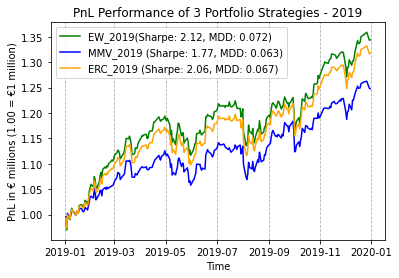

In [144]:
# Below, I've created a single graph of three PNL trajecterios with an initial wealth of 1 million euros.
# Please note the Y-axis label, where I've specified that PnL values are in € millions (1.00 = €1 million). Thus, the Y-axis value techincally starts from €1 million.

# For each strategy, computing portfolio returns over 2019 data
EW_Folio = EquallyWeighted('EW_2019', returns)
MMV_Folio = MarkowitzMinimumVariance('MVV_2019', returns, Var_Cov_Mtx)
ERC_Folio = EqualRiskContribution('ERC_2019', returns, Top_Returns_17_18)

# Plotting figures to get the PNL and risk measures for each strategy on a single graph
fig, ax = plt.subplots(1, 1)
plt.plot(EW_Folio.returns.index, EW_Folio.pnl[1:], 'g', label='EW_2019' + '(Sharpe: %.2f, MDD: %.3f)'%
                                                          (EW_Folio.sharpe_ratio(), EW_Folio.max_dd()))
plt.plot(MMV_Folio.returns.index, MMV_Folio.pnl[1:], 'b', label='MMV_2019' + ' (Sharpe: %.2f, MDD: %.3f)'%
                                                          (MMV_Folio.sharpe_ratio(), MMV_Folio.max_dd()))
plt.plot(ERC_Folio.returns.index, ERC_Folio.pnl[1:], 'orange', label='ERC_2019' + ' (Sharpe: %.2f, MDD: %.3f)'%
                                                          (ERC_Folio.sharpe_ratio(), ERC_Folio.max_dd()))

# Editing the graph for readability 
plt.xlabel('Time')
plt.ylabel('PnL in € millions (1.00 = €1 million)')
plt.legend()
plt.tick_params(axis='x')
plt.title('PnL Performance of 3 Portfolio Strategies - 2019')
plt.grid(axis='x', linestyle='--')

# Saving figure
fig.savefig('PnL Performance of 3 Portfolio Strategies - 2019.pdf')

plt.show()